In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import time

data = pd.read_csv("./chart_data.csv", usecols=["date", "price"], parse_dates=["date"])
data.to_csv("./priceChartData.csv", index=False)
data.sort_values("date", inplace=True)

date_initial = pd.to_datetime("2011-01-04") + pd.Timedelta("90 days")
data_initial = data[data.date < date_initial]
median_initial = data_initial.price.median()
lower_initial = data_initial.price.quantile(.25)
upper_initial = data_initial.price.quantile(.75)
mean_initial = data_initial.price.mean()
std_initial = data_initial.price.std()
lower_std_initial = mean_initial - std_initial
upper_std_initial = data_initial.price.quantile(.75)

start = time.time()
interval = 1
for i, indice in enumerate(data.index):
    if data.at[indice, "date"] < date_initial:
        data.at[indice, "median_value"] = median_initial
        data.at[indice, "lower"] = lower_initial
        data.at[indice, "upper"] = upper_initial
        data.at[indice, "mean_value"] = mean_initial
        data.at[indice, "lower_std"] = lower_std_initial
        data.at[indice, "upper_std"] = upper_std_initial
    
    else:
        data_90days = data[(data.date > data.at[indice, "date"] - pd.Timedelta("90 days")) & (data.date <= data.at[indice, "date"])]
        
        data.at[indice, "median_value"] = data_90days.price.median()
        data.at[indice, "lower"] = data_90days.price.quantile(.25)
        data.at[indice, "upper"] = data_90days.price.quantile(.75)
        data.at[indice, "mean_value"] = data_90days.price.mean()
        data.at[indice, "lower_std"] = data_90days.price.mean() - data_90days.price.std()
        data.at[indice, "upper_std"] = data_90days.price.mean() + data_90days.price.std()
    
    if time.time() - interval > start:
        interval = interval + 1
        print(f"processing ... {i / (len(data) - 1):.1%}", end="\r")
print("processing ... complete", end="\r")

No handles with labels found to put in legend.


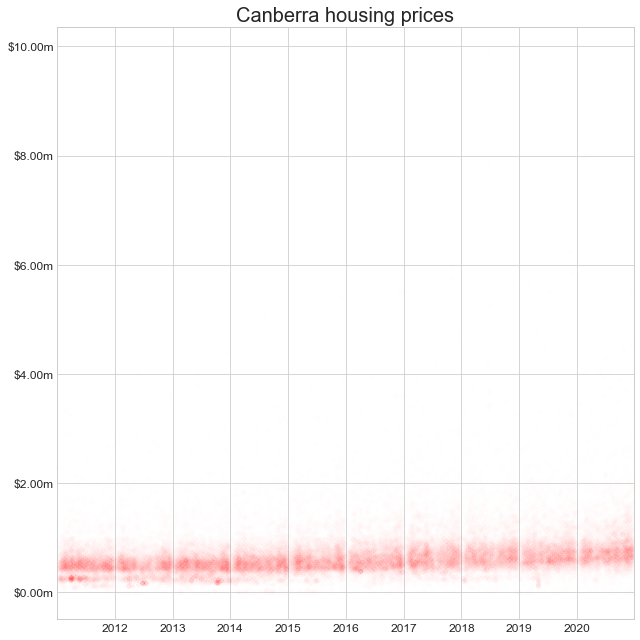

In [86]:
fig, ax = plt.subplots(figsize=(9, 9))
plt.style.use("seaborn-whitegrid")
data.plot.scatter("date", "price", alpha=.005, ax=ax, fontsize=12, c="#FF6100")
# data.plot("date", "median_value", ax=ax, linewidth=3, c="#009CBF", label="three-month median")
# data.plot("date", "upper", ax=ax, c="#00A388", linewidth=2, label="upper quartile", linestyle="dotted")
# data.plot("date", "lower", ax=ax, c="#EA526F", linewidth=2, label="lower quartile", linestyle="dotted")
ax.yaxis.set_major_formatter(lambda x, p: f"${x/1000000:,.2f}m")
ax.yaxis.label.set_visible(False)
ax.xaxis.label.set_visible(False)
# plt.ylim((0, 2000000))
plt.margins(x=0)
plt.title("Canberra housing prices", fontsize=20)
# plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig("housing_prices.png")
plt.show()